In [77]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

load the dataset

In [78]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [79]:
X_train.shape

(50000, 32, 32, 3)

In [80]:
y_train.shape

(50000, 1)

In [81]:
y_train[:5] #reshape this 2d array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [82]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [83]:
X_test.shape

(10000, 32, 32, 3)

In [84]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'god', 'frog', 'horse', 'ship', 'truck']

In [85]:
classes[9]

'truck'

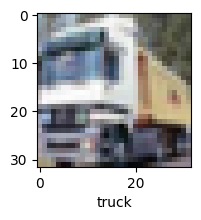

In [86]:
def plot_sample(X, y, index):
    plt.figure(figsize=(20,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
    
plot_sample(X_train, y_train, 1)

In [87]:
X_train = X_train/255
X_test = X_test/255

In [88]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation= 'relu'),
    layers.Dense(1000, activation= 'relu'),
    layers.Dense(10, activation= 'sigmoid') #by ten categories
])

In [89]:
ann.compile(optimizer='SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics =['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 140s 88ms/step - loss: 1.8123 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.6195 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 165s 106ms/step - loss: 1.5435 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4828 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4328 - accuracy: 0.4954


In [90]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report :\n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 26ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.47      0.53      1000
           1       0.51      0.74      0.61      1000
           2       0.33      0.42      0.37      1000
           3       0.32      0.47      0.38      1000
           4       0.36      0.52      0.43      1000
           5       0.51      0.26      0.34      1000
           6       0.62      0.36      0.46      1000
           7       0.67      0.40      0.50      1000
           8       0.55      0.69      0.61      1000
           9       0.64      0.40      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [91]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [92]:
cnn.compile(
            loss= 'sparse_categorical_crossentropy',
            optimizer='Adam',
            metrics =['accuracy'])

In [93]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.5182 - accuracy: 0.4515
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1485 - accuracy: 0.5952
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0213 - accuracy: 0.6427
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9404 - accuracy: 0.6727
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8765 - accuracy: 0.6944
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8307 - accuracy: 0.7108
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7860 - accuracy: 0.7265
Epoch 8/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7450 - accuracy: 0.7397
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7051 - accuracy: 0.7532
Epoch 10/10
1563/1563 [==============================] - 46s 29m

In [94]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9674 - accuracy: 0.6836


[0.9673662185668945, 0.6836000084877014]

In [95]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

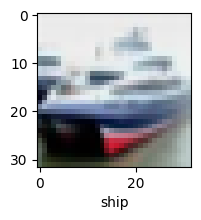

In [96]:
plot_sample(X_test, y_test, 1)

In [97]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[1.5498536e-03, 1.4281380e-05, 2.7694890e-02, 7.4817955e-01,
        4.1317256e-04, 3.0141342e-02, 7.4922629e-03, 1.7793816e-05,
        1.8449536e-01, 1.3432635e-06],
       [8.0498029e-03, 1.1075692e-01, 2.5782726e-06, 5.9036215e-06,
        8.1886157e-08, 1.1172452e-07, 1.0355553e-06, 1.1911202e-08,
        8.7947571e-01, 1.7078340e-03],
       [1.7405894e-01, 1.8576175e-01, 7.5944825e-03, 2.2344009e-03,
        4.9667922e-03, 5.0863920e-04, 1.1410158e-03, 8.2286517e-04,
        6.1349189e-01, 9.4191823e-03],
       [9.4492161e-01, 4.0639516e-02, 2.1762678e-03, 1.8254461e-03,
        5.7366741e-04, 2.5205634e-05, 1.0267899e-04, 9.7028904e-05,
        9.0819634e-03, 5.5653980e-04],
       [2.0307727e-06, 8.8162624e-06, 9.5181148e-03, 3.7491083e-02,
        2.4622180e-01, 2.4625997e-04, 7.0633870e-01, 2.0678820e-06,
        1.7041076e-04, 7.2180256e-07]], dtype=float32)

In [102]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [103]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

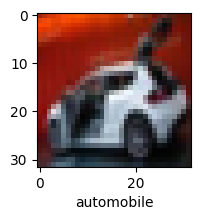

In [106]:
plot_sample(X_test, y_test, 6)

In [107]:
classes[y_classes[6]]

'automobile'